In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns

In [4]:
df = pd.read_csv("DSI_kickstarterscrape_dataset.csv",encoding = "ISO-8859-1")

In [26]:
df.pledged.mean()

4980.749678963979

In [28]:
df.backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

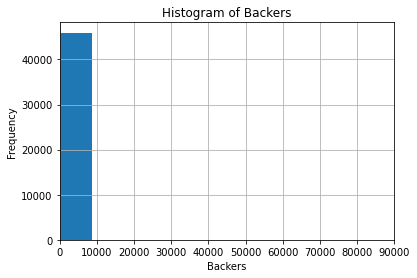

Skew value of 87.47111920387329


In [82]:
plt.hist(df.backers,bins=10)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Histogram of Backers')
plt.xlim(0,90000)
plt.grid(True)
plt.show()
print("Skew value of "+str(skew(df.backers)))

In [106]:
test = shapiro(df.duration)
print(test.statistic)
print(test.pvalue)
# Since p-value is less than 0.05, we reject the null hypothesis. There is sufficient evidence to say that the sample data does not come from a normal distribution

0.8854529857635498
0.0


/usr/local/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [103]:
print("Skew value of "+str(skew(df.duration)))
print("Kurtosis value of "+str(kurtosis(df.duration)))

Skew value of 1.07799160692895
Kurtosis value of 1.015075218403605


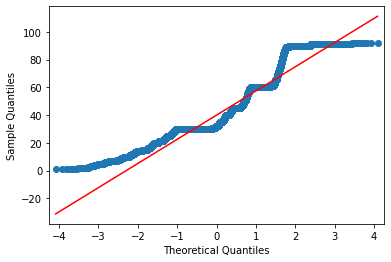

In [96]:
# QQ Plot
qqplot(df.duration, line='s')
plt.show()

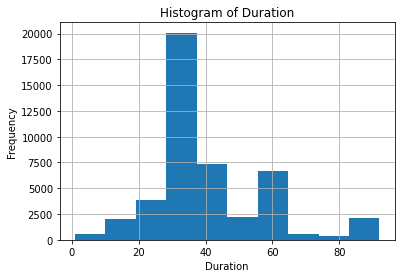

Skew value of 87.47111920387329


In [85]:
# Histogram
plt.hist(df.duration,bins=10)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.grid(True)
plt.show()


In [11]:
df_success = df.loc[df.status=="successful"]
df_fail = df.loc[df.status=="failed"]

df_success.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration,hour
count,2.296900e+04,22969.000000,2.296900e+04,22969.000000,22969.000000,22969.000000,22969.000000,22969.000000,22969.000000,22969.000000
mean,1.081375e+09,5483.827983,8.618658e+03,3.536888,119.377814,8.496844,6.687144,14.386564,37.960475,10.986678
std,6.206353e+08,12364.050311,7.964000e+04,125.146991,960.684332,4.455858,7.709163,236.591264,16.651234,7.809257
min,3.940900e+04,0.010000,1.000000e+00,0.999830,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.459046e+08,1300.000000,1.655000e+03,1.033750,29.000000,6.000000,2.000000,0.000000,30.000000,3.000000
50%,1.087977e+09,3000.000000,3.500000e+03,1.110000,52.000000,8.000000,5.000000,2.000000,31.000000,11.000000
75%,1.619003e+09,6000.000000,7.255000e+03,1.320000,96.000000,10.000000,9.000000,6.000000,45.000000,18.000000
max,2.147460e+09,900000.000000,1.026684e+07,15066.000000,87142.000000,80.000000,149.000000,19311.000000,91.960000,23.000000


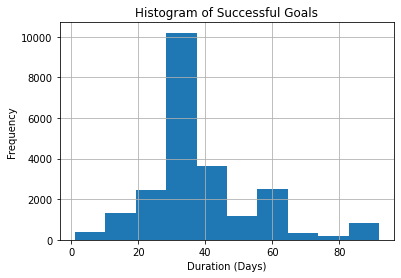

In [22]:
plt.hist(df_success.duration,bins=10)
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Successful Goals')
plt.grid(True)
plt.show()

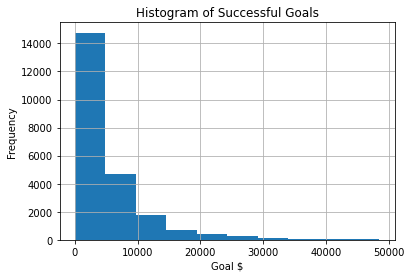

In [19]:
df_success_filtered = df_success.loc[df_success.goal<50000]
plt.hist(df_success_filtered.goal,bins=10)
plt.xlabel('Goal $')
plt.ylabel('Frequency')
plt.title('Histogram of Successful Goals')
plt.grid(True)
plt.show()

In [132]:
df_fail.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration,hour
count,1.899600e+04,1.899600e+04,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000
mean,1.081482e+09,1.635059e+04,897.338808,0.104861,12.569962,7.290061,1.496894,0.963361,42.977828,11.747315
std,6.226739e+08,2.191424e+05,2841.378678,0.150142,27.141372,3.739939,3.237130,4.886985,18.691720,7.887673
min,1.265810e+05,5.000000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.433854e+08,2.500000e+03,20.000000,0.002857,1.000000,5.000000,0.000000,0.000000,30.000000,4.000000
50%,1.072930e+09,5.000000e+03,170.000000,0.037400,4.000000,7.000000,0.000000,0.000000,36.000000,14.000000
75%,1.626056e+09,1.200000e+04,740.250000,0.148571,14.000000,9.000000,2.000000,1.000000,59.872500,19.000000
max,2.147370e+09,2.147484e+07,112287.000000,1.079700,882.000000,70.000000,83.000000,442.000000,91.960000,23.000000


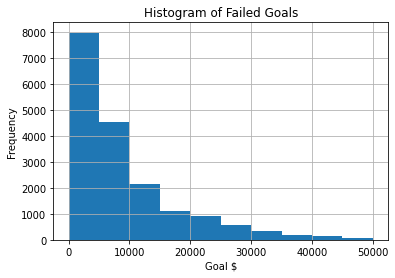

In [18]:
df_fail_filtered = df_fail.loc[df_fail.goal<50000]
plt.hist(df_fail_filtered.goal,bins=10)
plt.xlabel('Goal $')
plt.ylabel('Frequency')
plt.title('Histogram of Failed Goals')
plt.grid(True)
plt.show()

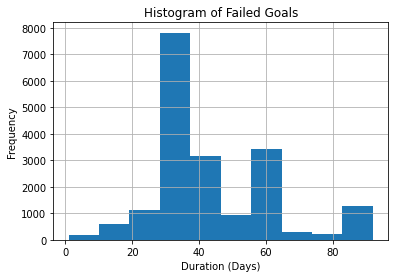

In [24]:
plt.hist(df_fail.duration,bins=10)
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.title('Histogram of Failed Goals')
plt.grid(True)
plt.show()

In [8]:
df.head()

,project id,name,url,category,subcategory,location,goal,pledged,funded percentage,backers,...,levels,reward levels,updates,comments,duration,status,hour,day,month,2197
0,1929840910,Double Fine Adventure,http://www.kickstarter.com/projects/doublefine...,Games,Video Games,"San Francisco, CA",400000.0,3336372.0,8.340930,87142,...,9,"$15,$30,$60,$100,$250,$500,$1,000,$5,000,$10,000",9,10159,33.92,successful,0,Wed,Mar,NaN
1,506924864,Pebble: E-Paper Watch for iPhone and Android,http://www.kickstarter.com/projects/597507018/...,Design,Product Design,"Palo Alto, CA",100000.0,10266845.0,102.668457,68929,...,11,"$1,$99,$115,$125,$220,$235,$240,$550,$1,000,$1...",13,7013,37.92,successful,3,Sat,May,NaN
2,2000827215,Wasteland 2,http://www.kickstarter.com/projects/inxile/was...,Games,Video Games,"Newport Beach, CA",900000.0,2933252.0,3.259169,61290,...,15,"$15,$30,$50,$55,$75,$100,$150,$150,$250,$500,$...",16,13133,35.00,successful,12,Tue,Apr,NaN
3,531044328,Shadowrun Returns,http://www.kickstarter.com/projects/1613260297...,Games,Video Games,"Bellevue, WA",400000.0,1836447.0,4.591118,36276,...,14,"$15,$30,$50,$60,$100,$125,$175,$250,$500,$1,00...",20,13850,24.77,successful,6,Sun,Apr,NaN
4,823772473,"Amanda Palmer: The new RECORD, ART BOOK, and TOUR",http://www.kickstarter.com/projects/amandapalm...,Music,Music,"Boston, MA",100000.0,1192793.0,11.927931,24883,...,24,"$1,$5,$25,$50,$100,$125,$250,$250,$300,$300,$3...",9,782,31.71,successful,3,Fri,Jun,NaN


In [5]:
df['date'] = df['date'].astype('datetime64[ns]')

/var/folders/2p/_ht4x02d5859684c2wb6vvhr0000gp/T/ipykernel_31827/3055862561.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = df.loc[df.status == 'successful',['hour', 'status']].append(df.loc[df.status == 'failed',   ['hour', 'status']])


[Text(0.5, 0, 'Launched Hour'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Hour the Project was Launched')]

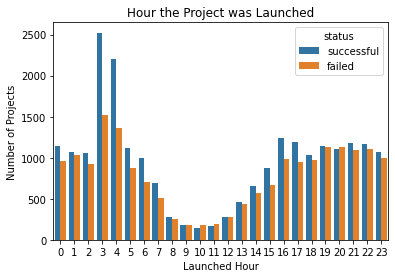

In [20]:
df['hour'] = df['date'].apply(lambda x: x.hour)
df['day'] = df['date'].apply(lambda x: x.day)
df['month'] = df['date'].apply(lambda x: x.month)

test = df.loc[df.status == 'successful',['hour', 'status']].append(df.loc[df.status == 'failed',   ['hour', 'status']])
ax = sns.countplot(x=test.hour, hue = test.status)
ax.set(xlabel='Launched Hour', ylabel='Number of Projects', title= 'Hour the Project was Launched')

In [11]:
test.value_counts()

hour  status    
3     successful    2523
4     successful    2197
3     failed        1519
4     failed        1368
16    successful    1242
17    successful    1191
21    successful    1178
22    successful    1167
19    successful    1142
0     successful    1137
20    failed        1129
19    failed        1127
5     successful    1121
20    successful    1106
22    failed        1102
21    failed        1094
23    successful    1069
1     successful    1067
2     successful    1053
18    successful    1033
1     failed        1029
6     successful     999
23    failed         996
16    failed         989
18    failed         969
0     failed         964
17    failed         952
2     failed         919
15    successful     870
5     failed         869
6     failed         700
7     successful     698
15    failed         667
14    successful     658
      failed         570
7     failed         507
13    successful     456
      failed         434
12    successful     283
8     su

/var/folders/2p/_ht4x02d5859684c2wb6vvhr0000gp/T/ipykernel_31827/2768372267.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test2 = df.loc[df.status == 'successful',['month', 'status']].append(df.loc[df.status == 'failed',   ['month', 'status']])


[Text(0.5, 0, 'Launched Month'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Month the Project was Launched')]

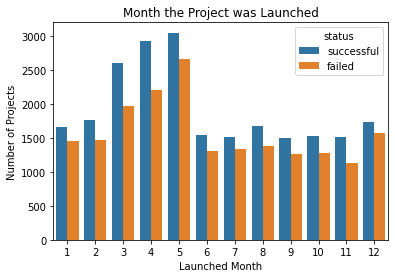

In [8]:
test2 = df.loc[df.status == 'successful',['month', 'status']].append(df.loc[df.status == 'failed',   ['month', 'status']])
ax = sns.countplot(x=test2.month, hue = test2.status)
ax.set(xlabel='Launched Month', ylabel='Number of Projects', title= 'Month the Project was Launched')

In [13]:
test2.value_counts()

month  status    
5      successful    3044
4      successful    2929
5      failed        2664
3      successful    2592
4      failed        2197
3      failed        1967
2      successful    1764
12     successful    1725
8      successful    1666
1      successful    1659
12     failed        1574
6      successful    1536
10     successful    1530
11     successful    1517
7      successful    1511
9      successful    1496
2      failed        1469
1      failed        1446
8      failed        1378
7      failed        1336
6      failed        1312
10     failed        1271
9      failed        1259
11     failed        1123
dtype: int64

/var/folders/2p/_ht4x02d5859684c2wb6vvhr0000gp/T/ipykernel_31827/2080278217.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test3 = df.loc[df.status == 'successful',['day', 'status']].append(df.loc[df.status == 'failed',   ['day', 'status']])


[Text(0.5, 0, 'Launched Day'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'Day the Project was Launched')]

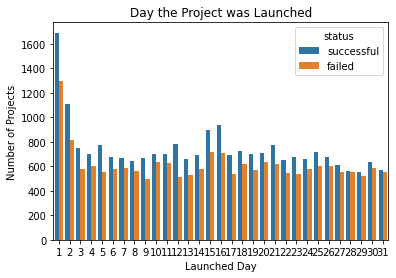

In [10]:
test3 = df.loc[df.status == 'successful',['day', 'status']].append(df.loc[df.status == 'failed',   ['day', 'status']])
ax = sns.countplot(x=test3.day, hue = test3.status)
ax.set(xlabel='Launched Day', ylabel='Number of Projects', title= 'Day the Project was Launched')

In [7]:
test3.value_counts().to_csv('test3.csv')

In [22]:
df.to_csv('heatmap.csv')

/var/folders/2p/_ht4x02d5859684c2wb6vvhr0000gp/T/ipykernel_36296/3780779016.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test4 = df.loc[df.status == 'successful',['weekday', 'status']].append(df.loc[df.status == 'failed',   ['weekday', 'status']])


[Text(0.5, 0, 'Launched WeekDay'),
 Text(0, 0.5, 'Number of Projects'),
 Text(0.5, 1.0, 'WeekDay the Project was Launched')]

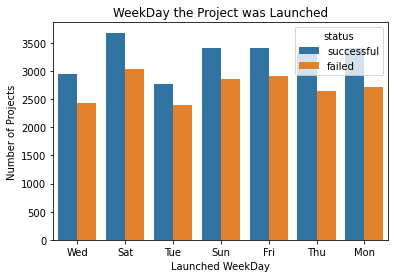

In [8]:
test4 = df.loc[df.status == 'successful',['weekday', 'status']].append(df.loc[df.status == 'failed',   ['weekday', 'status']])
ax = sns.countplot(x=test4.weekday, hue = test4.status)
ax.set(xlabel='Launched WeekDay', ylabel='Number of Projects', title= 'WeekDay the Project was Launched')


In [9]:
test4.value_counts().to_csv('test4.csv')